In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression


df_listing = pd.read_csv("../../raw_data/sfo/listings-1.csv")
df_transit = pd.read_csv("data/sfo_distance.csv")

In [2]:
df_transit

id  distance  duration
0          958        14         3
1         5858       366        91
2         7918        45         8
3         8142        45         8
4         8339       102        27
...        ...       ...       ...
6835  42973015        22         4
6836  42982252       193        56
6837  42989740       266        46
6838  42990899       585       140
6839  42999658       305        56

[6840 rows x 3 columns]

In [3]:
df_listing["price"]

0       $132.00
1       $235.00
2        $56.00
3        $56.00
4       $750.00
         ...   
7269     $71.00
7270     $62.00
7271    $399.00
7272    $120.00
7273    $120.00
Name: price, Length: 7274, dtype: object

In [58]:
df = pd.merge(df_transit, df_listing, on="id")
df[["distance", "duration", "price"]]

distance  duration    price
0           14         3  $132.00
1          366        91  $235.00
2           45         8   $56.00
3           45         8   $56.00
4          102        27  $750.00
...        ...       ...      ...
6835        22         4  $182.00
6836       193        56   $45.00
6837       266        46  $276.00
6838       585       140   $33.00
6839       305        56   $90.00

[6840 rows x 3 columns]

In [5]:
df["price"] = df.price.str.replace('$','')

df["price"].replace(',','', regex=True, inplace=True)
df["price"].astype(float)

0       132.0
1       235.0
2        56.0
3        56.0
4       750.0
        ...  
6835    182.0
6836     45.0
6837    276.0
6838     33.0
6839     90.0
Name: price, Length: 6840, dtype: float64

<ipython-input-6-2fe4e418f024>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["property_type"] == "Entire apartment"][df["distance"] < 2000], x="price", y="distance"


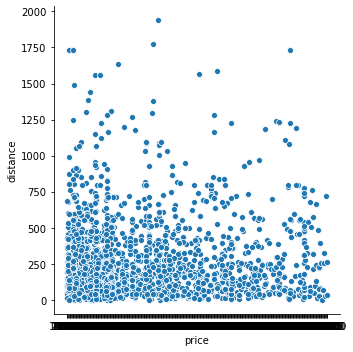

In [6]:
# Create a visualization
sns.relplot(
    data=df[df["property_type"] == "Entire apartment"][df["distance"] < 2000], x="price", y="distance"
)

In [41]:
Y = df[df["property_type"] == "Entire apartment"][df["distance"] < 1500].loc[:, "distance"].values.reshape(-1, 1)  # values converts it into a numpy array
X = df[df["property_type"] == "Entire apartment"][df["distance"] < 1500].loc[:, "price"].values .reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

<ipython-input-41-59191a2991a0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y = df[df["property_type"] == "Entire apartment"][df["distance"] < 1500].loc[:, "distance"].values.reshape(-1, 1)  # values converts it into a numpy array
<ipython-input-41-59191a2991a0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = df[df["property_type"] == "Entire apartment"][df["distance"] < 1500].loc[:, "price"].values .reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column


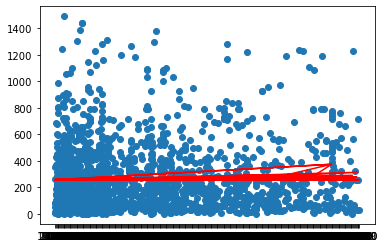

In [42]:
plt.scatter(X.ravel().tolist(),Y)
plt.plot(X.ravel().tolist(), Y_pred, color='red')
plt.show()


In [43]:
# The coefficients
print('Coefficients: \n', linear_regressor.coef_)

Coefficients: 
 [[0.01176267]]


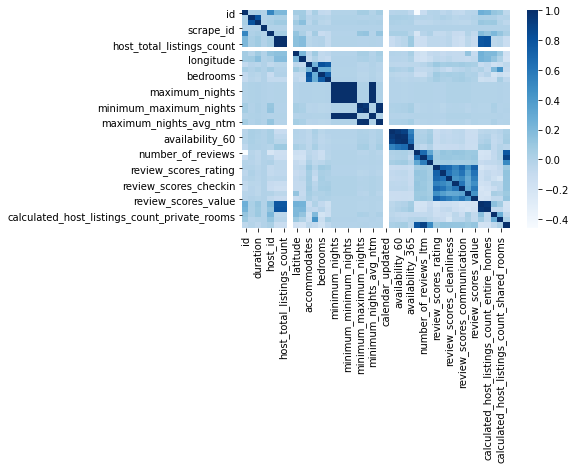

In [44]:
corr = df.corr()

# Draw heatmap
sns.heatmap(corr, cmap="Blues")

plt.show()

In [49]:
corr

id      distance  \
id                                            1.000000e+00  2.157428e-02   
distance                                      2.157428e-02  1.000000e+00   
duration                                      3.629922e-02  8.080195e-01   
scrape_id                                     6.115439e-14  1.796784e-16   
host_id                                       5.185971e-01  8.836149e-03   
host_listings_count                           2.051713e-01  3.457546e-02   
host_total_listings_count                     2.051713e-01  3.457546e-02   
neighbourhood_group_cleansed                           NaN           NaN   
latitude                                      6.378791e-02 -1.595605e-02   
longitude                                     6.973206e-02  7.373753e-02   
accommodates                                 -7.733395e-02 -2.009321e-02   
bathrooms                                     4.268871e-02  2.064216e-03   
bedrooms                                     -7.431944e-02 -1.594073e-02   
beds                                         -8.630201e-02 -2.940708e-02   
minimum_nights                               -5.744972e-03  8.107629e-03   
maximum_nights                               -5.687056e-03  8.111112e-03   
minimum_minimum_nights                       -5.743368e-03  8.107339e-03   
maximum_minimum_nights                       -5.727867e-03  8.108983e-03   
minimum_maximum_nights                        5.551380e-02  1.213550e-03   
maximum_maximum_nights                        5.833826e-02 -3.246409e-05   
minimum_nights_avg_ntm                       -5.728386e-03  8.108928e-03   
maximum_nights_avg_ntm                        5.787810e-02  4.794901e-04   
calendar_updated                                       NaN           NaN   
availability_30                              -2.026995e-02  3.645781e-02   
availability_60                              -1.673716e-02  3.471214e-02   
availability_90                              -1.719032e-02  3.120190e-02   
availability_365                             -6.094088e-02  1.642001e-02   
number_of_reviews                            -4.586379e-01 -2.716707e-02   
number_of_reviews_ltm                        -1.057674e-01 -1.441913e-02   
number_of_reviews_l30d                       -1.644380e-02 -2.172705e-02   
review_scores_rating                         -1.239498e-02 -3.292903e-03   
review_scores_accuracy                       -5.236499e-02  1.228198e-02   
review_scores_cleanliness                    -2.559283e-02 -6.065346e-03   
review_scores_checkin                        -6.629138e-02 -3.205291e-02   
review_scores_communication                  -7.905669e-02 -2.283283e-02   
review_scores_location                       -2.679641e-02 -2.145992e-02   
review_scores_value                          -2.087194e-02  2.257584e-03   
calculated_host_listings_count                2.649099e-01  2.651001e-02   
calculated_host_listings_count_entire_homes   2.339819e-01  2.486357e-02   
calculated_host_listings_count_private_rooms  1.180065e-01  2.020349e-02   
calculated_host_listings_count_shared_rooms   9.116136e-02 -2.149813e-02   
reviews_per_month                            -5.916776e-02 -1.493284e-02   

                                                  duration     scrape_id  \
id                                            3.629922e-02  6.115439e-14   
distance                                      8.080195e-01  1.796784e-16   
duration                                      1.000000e+00  2.649020e-15   
scrape_id                                     2.649020e-15  1.000000e+00   
host_id                                       3.386351e-02 -4.837474e-14   
host_listings_count                           7.741611e-02  3.211530e-15   
host_total_listings_count                     7.741611e-02  3.211530e-15   
neighbourhood_group_cleansed                           NaN           NaN   
latitude                                      7.472434e-02  2.943902e-13   
longitude                  

In [55]:
df1 = df[['price', 'distance', 'duration']]
df1['price'] = df1['price'].astype(float)

<ipython-input-55-0d2da52d6b8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df1['price'].astype(float)


In [56]:
df1.corr()


price  distance  duration
price     1.000000  0.003182  0.013225
distance  0.003182  1.000000  0.808019
duration  0.013225  0.808019  1.000000

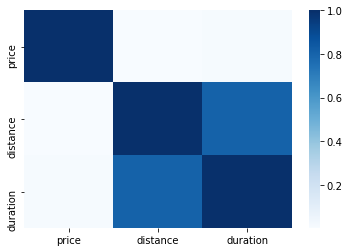

In [57]:
# Draw heatmap
sns.heatmap(df1.corr(), cmap="Blues")

plt.show()